In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import*
from sklearn.datasets import*
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import*

In [2]:
veri=pd.read_excel("https://www.dropbox.com/s/49u0cutfy0i8drh/T-shirt.xlsx?dl=1")
veri.head()

,Unnamed: 0,Boy,Kilo,Beden
0,0,149,51,S
1,1,151,50,S
2,2,145,57,S
3,3,148,54,S
4,4,149,55,S


In [3]:
veri.shape

(157, 4)

In [4]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  157 non-null    int64 
 1   Boy         157 non-null    int64 
 2   Kilo        157 non-null    int64 
 3   Beden       157 non-null    object
dtypes: int64(3), object(1)
memory usage: 5.0+ KB


In [5]:
veri.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,157.0,78.000000,45.466105,0.0,39.0,78.0,117.0,156.0
Boy,157.0,159.757962,10.870096,145.0,151.0,156.0,167.0,184.0
Kilo,157.0,64.630573,12.553622,48.0,55.0,62.0,73.0,91.0


<AxesSubplot:>

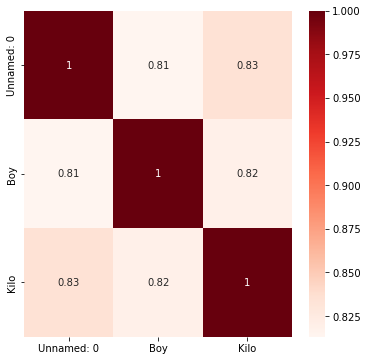

In [6]:
plt.figure(figsize=(6,6))
cor=veri.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)

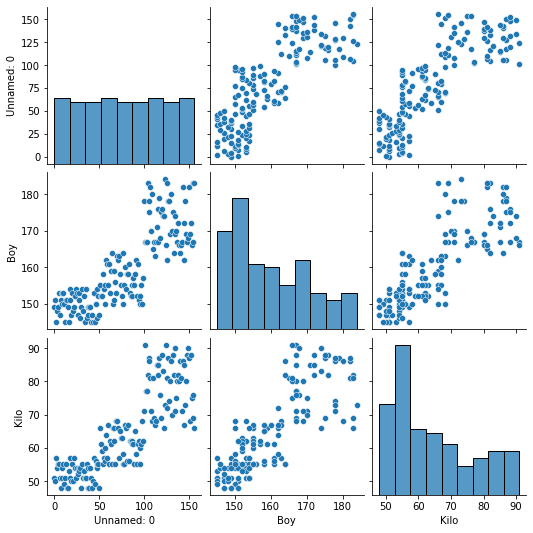

In [7]:
sns.pairplot(veri)

In [8]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
x=veri[['Boy','Kilo']]
y=veri['Beden']
le=LabelEncoder()
y=le.fit_transform(y)
x_egitim,x_test,y_egitim,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [10]:
model=[]
model.append(("model_knn",KNeighborsClassifier()))
model.append(("model_nb",GaussianNB()))
model.append(("model_mlp",MLPClassifier()))
model.append(("model_lr",LogisticRegression()))

In [11]:
for name,k in model:
    kfold=KFold(n_splits=10,shuffle=True,random_state=0)
    basla=cross_val_score(k,x_egitim,y_egitim,cv=kfold,scoring="accuracy")
    print(name," ICIN KFOLD SONUCLARI: %.2f"%basla.mean())

model_knn  ICIN KFOLD SONUCLARI: 0.95
model_nb  ICIN KFOLD SONUCLARI: 0.97


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neural_network\_

model_mlp  ICIN KFOLD SONUCLARI: 0.53


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

model_lr  ICIN KFOLD SONUCLARI: 0.95


In [12]:
for name,k in model:
    k.fit(x_egitim,y_egitim)
    tahmin_test=k.predict(x_test)
    print(name," ICIN DOGRULUK SKORU: %.2f"%accuracy_score(y_test,tahmin_test))

model_knn  ICIN DOGRULUK SKORU: 0.94
model_nb  ICIN DOGRULUK SKORU: 0.91
model_mlp  ICIN DOGRULUK SKORU: 0.38
model_lr  ICIN DOGRULUK SKORU: 0.94


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
model_knn=KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(1,10,1)}
scoring={'Accuracy':'accuracy'}
knn=GridSearchCV(model_knn,return_train_score=True,param_grid=param_grid,scoring=scoring,cv=10,refit='Accuracy')
knn.fit(x_egitim,y_egitim)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             refit='Accuracy', return_train_score=True,
             scoring={'Accuracy': 'accuracy'})

In [16]:
print("\nEN IYI PARAMETRELER: %s"%knn.best_estimator_)
print()
print("\nOPTIMUM HIPERPARAMETRELER: %s"%knn.best_params_)
print()
print("\nOPTIMUM SKOR: %.2f"%knn.best_score_)
print()


EN IYI PARAMETRELER: KNeighborsClassifier(n_neighbors=4)


OPTIMUM HIPERPARAMETRELER: {'n_neighbors': 4}


OPTIMUM SKOR: 0.94



In [17]:
tahmin_egitim=knn.best_estimator_.predict(x_egitim)
tahmin_test=knn.best_estimator_.predict(x_test)
print("\nEGITIM ICIN KNN DOGRULUK ORANI: %.2f"%accuracy_score(y_egitim,tahmin_egitim))
print()
print("\nTEST ICIN KNN DOGRULUK ORANI: %.2f"%accuracy_score(y_test,tahmin_test))
print()


EGITIM ICIN KNN DOGRULUK ORANI: 0.95


TEST ICIN KNN DOGRULUK ORANI: 0.94



In [ ]:
while True:
    liste=[]
    boy=float(input("\nBOY GIRINIZ: "))
    kilo=float(input("\nKILO GIRINIZ: "))
    liste.append(boy)
    liste.append(kilo)
    dene=np.array([liste])
    deneme_tahmin=knn.predict(dene)
    deneme_tahmin=le.inverse_transform(deneme_tahmin)
    print(deneme_tahmin)
    cevap=str(input("\nISLEM DEVAM ETSIN MI: ")).upper()
    if(cevap=='E'):
        continue
    else:
        break